In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-toxicity-prediction-challenge/sample_submission.csv
/kaggle/input/the-toxicity-prediction-challenge/feamat.csv
/kaggle/input/the-toxicity-prediction-challenge/features_id_name_mappings.csv
/kaggle/input/the-toxicity-prediction-challenge/train.csv
/kaggle/input/the-toxicity-prediction-challenge/test.csv


### Step 1. Reading train.csv file
> Parsing the training file by paying attention to the delimiters. We split by a comma and a semi colon. Eventually, we get three columns from train.csv including chemical id, assay id and label.

In [2]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/the-toxicity-prediction-challenge/train.csv', sep=',|;')
train_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Id,Expected
2971-36-0,1644,2
693-54-9,2451,2
7173-51-5,1384,2
138261-41-3,16,2
7681-82-5,1856,2


In [3]:
train_df.reset_index(inplace=True)
train_df = train_df.rename(columns={"index": "V1"})
train_df.head()

,V1,Id,Expected
0,2971-36-0,1644,2
1,693-54-9,2451,2
2,7173-51-5,1384,2
3,138261-41-3,16,2
4,7681-82-5,1856,2


In [4]:
#check its shape
train_df.shape

(77413, 3)

In [5]:
#check its datatype
train_df.dtypes

V1          object
Id           int64
Expected     int64
dtype: object

### Step 2 (a). Preparing the dataset for each assay
> Parsing the train.csv file and extracting rows for each assay on a different file.

In [6]:
#Finding out how many unique chemical ID's are there.
print(train_df['V1'].unique())
print("\n There are {} unique Assay Id's".format(len(train_df['V1'].unique())))

['2971-36-0' '693-54-9' '7173-51-5' ... '104-50-7' '2021-28-5' '6358-09-4']

 There are 3393 unique Assay Id's


### Step 2(b) Reading feamat.csv

In [7]:
feamat_df = pd.read_csv('/kaggle/input/the-toxicity-prediction-challenge/feamat.csv', sep=';|,')
feamat_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1066,V1067,V1068,V1069,V1070,V1071,V1072,V1073,V1074,V1075
0,60-35-5,178,59.037114,-0.808,43.09,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,103-90-2,1983,151.063329,0.870,49.33,0.0,0.0,0.0,0.083333,0.142259,...,0,0,0,0,0,0,0,0,0,0
2,968-81-0,1989,324.114378,2.960,100.72,0.0,0.0,0.0,0.185395,0.161948,...,0,0,0,0,0,0,0,0,0,0
3,520-45-6,122903,168.042259,-0.551,60.44,0.0,0.0,0.0,0.055556,0.198742,...,0,0,0,0,0,0,0,0,0,0
4,50594-66-6,44073,360.996485,4.557,89.67,0.0,0.0,0.0,0.136083,0.276855,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#check its shape
feamat_df.shape

(8831, 1075)

In [9]:
#check its data type
feamat_df.dtypes

V1        object
V2         int64
V3       float64
V4       float64
V5       float64
          ...   
V1071      int64
V1072      int64
V1073      int64
V1074      int64
V1075      int64
Length: 1075, dtype: object

### Step 2 (c) Matching the first column of feamat.csv with train.csv

In [10]:
combined_df = train_df.merge(feamat_df, on = ['V1'],how = 'left')
combined_df.head()


,V1,Id,Expected,V2,V3,V4,V5,V6,V7,V8,...,V1066,V1067,V1068,V1069,V1070,V1071,V1072,V1073,V1074,V1075
0,2971-36-0,1644,2,76302,315.982463,4.592,40.46,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,693-54-9,2451,2,12741,156.151415,3.852,17.07,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,7173-51-5,1384,2,23558,361.347528,9.912,0.00,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,138261-41-3,16,2,86418,255.052302,2.294,83.66,0.0,0.0,0.117851,...,0,0,0,0,0,0,0,0,0,0
4,7681-82-5,1856,2,5238,149.894242,1.050,0.00,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#check its shape
combined_df.shape

(77413, 1077)

### DATA PREPROCESSING
#### 1. INF VALUES
> dataset contains inf values, so we need to remove those. Replacing inf with nan value and later imputing the nan values

In [12]:
#replacing inf with nan value
import numpy as np
combined_df = combined_df.replace([np.inf, -np.inf], np.nan)

#### 2. Checking null and nan values
> contains 1 null value & nan value

In [13]:
combined_df.isnull().any().sum()

1

#### 3. Fill nan value

In [14]:
combined_df = combined_df.fillna(0)

#### 4. Find number of classes for target variable¶
> As can be seen there are only 2 labels, it is a binary classification problem.

In [15]:
combined_df['Expected'].value_counts()


2    66495
1    10918
Name: Expected, dtype: int64

#### 5. Plotting class distributions
> It can be seen that class 2 has more number of samples than class 1, so it is clear case of unbalanced datase

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


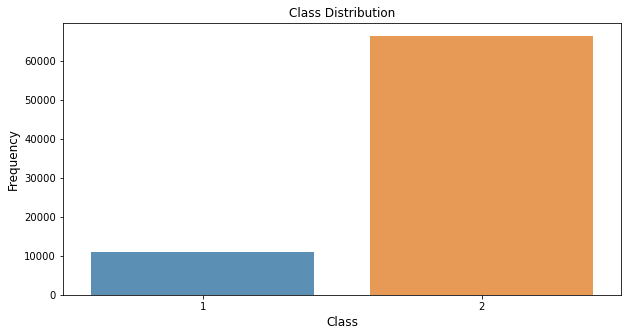

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
class_count  = combined_df['Expected'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(class_count.index, class_count.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

#### 6. Enconding Object Data type

In [17]:
#value counts
feamat_df["V1"].value_counts()

2295-58-1     1
22936-75-0    1
4994-16-5     1
150-13-0      1
92623-83-1    1
             ..
78-94-4       1
3118-97-6     1
485-72-3      1
32986-56-4    1
71-67-0       1
Name: V1, Length: 8831, dtype: int64

#### 7. Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
feamat_df['V1'] = encoder.fit_transform(feamat_df['V1'])

feamat_df.head() #Results in appending a new column to 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1066,V1067,V1068,V1069,V1070,V1071,V1072,V1073,V1074,V1075
0,6088,178,59.037114,-0.808,43.09,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,246,1983,151.063329,0.870,49.33,0.0,0.0,0.0,0.083333,0.142259,...,0,0,0,0,0,0,0,0,0,0
2,8586,1989,324.114378,2.960,100.72,0.0,0.0,0.0,0.185395,0.161948,...,0,0,0,0,0,0,0,0,0,0
3,5224,122903,168.042259,-0.551,60.44,0.0,0.0,0.0,0.055556,0.198742,...,0,0,0,0,0,0,0,0,0,0
4,5064,44073,360.996485,4.557,89.67,0.0,0.0,0.0,0.136083,0.276855,...,0,0,0,0,0,0,0,0,0,0


In [19]:
combined_df['V1'] = encoder.transform(combined_df['V1'])
combined_df.head()

,V1,Id,Expected,V2,V3,V4,V5,V6,V7,V8,...,V1066,V1067,V1068,V1069,V1070,V1071,V1072,V1073,V1074,V1075
0,3799,1644,2,76302,315.982463,4.592,40.46,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,6930,2451,2,12741,156.151415,3.852,17.07,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,7062,1384,2,23558,361.347528,9.912,0.00,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,1852,16,2,86418,255.052302,2.294,83.66,0.0,0.0,0.117851,...,0,0,0,0,0,0,0,0,0,0
4,7375,1856,2,5238,149.894242,1.050,0.00,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


#### 7. Preparing X and y data for training
> X containing all the feature variables (removing V1 variable and target variable) and y containing target variable.

In [20]:
X = combined_df.drop(['Expected'], axis=1)
y = combined_df['Expected']

#### 8. train test split


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 9. Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[5.20512239e-01, 6.14851081e-01, 1.78514837e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.42565730e-01, 0.00000000e+00, 5.54531100e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.08703536e-01, 9.99592003e-01, 1.40292768e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.52447869e-01, 5.64259486e-01, 1.47990515e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.23572076e-01, 9.79192166e-03, 5.66716829e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30394379e-01, 5.60995512e-01, 2.62221166e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Training Score {}".format(model.score(X_train, y_train)))
print("Testing Score {}".format(model.score(X_test, y_test)))

Training Score 1.0
Testing Score 0.8773493509009882


In [24]:
#testing accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8773493509009882


In [25]:
##print feature importances
print(model.feature_importances_)

[0.0299181  0.44659921 0.02286946 ... 0.         0.         0.        ]


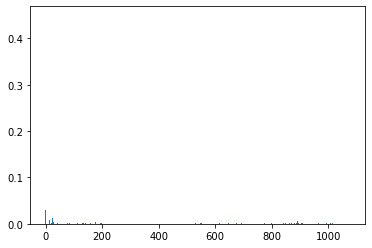

In [26]:
## plot feature importance
importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
from sklearn.feature_selection import SelectFromModel

best_model = SelectFromModel(model, threshold=0.016)

# Train the selector
best_model.fit(X_train, y_train)

# Transform the data to create a new dataset containing only the most important features
X_important_train = best_model.transform(X_train)
X_important_test = best_model.transform(X_test)

In [28]:
#after feature selection shape is
X_important_train.shape

(61930, 6)

In [29]:
X_important_all = best_model.transform(X)

In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# define the base models
level0 = list()
level0.append(('gnb', GaussianNB()))
level0.append(('lr', LogisticRegression()))
level0.append(('rf', RandomForestClassifier()))
level0.append(('bc', BaggingClassifier()))
level0.append(('dt', DecisionTreeClassifier()))
# define meta learner model
level1 = LogisticRegression()


from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

#cv = KFold(n_splits=8, random_state=1, shuffle=True)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define the stacking ensemble
#model = VotingClassifier(estimators = level0, voting='soft', weights=[1,1,2,2],flatten_transform=True)
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_important_train, y_train)


print("Training Score {}".format(model.score(X_important_train, y_train)))
print("Testing Score {}".format(model.score(X_important_test, y_test)))

Training Score 0.9943323106733408
Testing Score 0.8918814183297811


In [31]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_important_test)
f1_score(y_test, y_pred, average='macro')

0.7353809992869588

In [32]:
model.fit(X_important_all, y)

StackingClassifier(cv=5,
                   estimators=[('gnb', GaussianNB()),
                               ('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('bc', BaggingClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

#### Step 4: Parse test.csv and generate predictions

In [33]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

print("Training Score {}".format(model.score(X_important_all, y)))
print("Testing Score {}".format(model.score(X_important_test, y_test)))

Training Score 0.9942645292134396
Testing Score 0.9944455208938836


In [34]:
#Read test data

import pandas as pd
test_df = pd.read_csv('/kaggle/input/the-toxicity-prediction-challenge/test.csv', sep=',|;')
test_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,x
88-60-8,1682
122931-48-0,1656
NOCAS_47311,36
55589-62-3,1850
79902-63-9,30


In [35]:
test_df.reset_index(inplace=True)
test_df = test_df.rename(columns={"index": "V1"})
test_df.head()

,V1,x
0,88-60-8,1682
1,122931-48-0,1656
2,NOCAS_47311,36
3,55589-62-3,1850
4,79902-63-9,30


In [36]:
feamat_df = pd.read_csv('/kaggle/input/the-toxicity-prediction-challenge/feamat.csv', sep=';|,')
df =  test_df.merge(feamat_df, on = ['V1'],how = 'left')
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,V1,x,V2,V3,V4,V5,V6,V7,V8,V9,...,V1066,V1067,V1068,V1069,V1070,V1071,V1072,V1073,V1074,V1075
0,88-60-8,1682,6937,164.120115,3.659,20.23,0.0,0.0,0.000000,0.068041,...,0,0,0,0,0,0,0,0,0,0
1,122931-48-0,1656,91779,431.056940,1.258,183.30,0.0,0.0,0.000000,0.151375,...,0,0,0,0,0,0,0,0,0,0
2,NOCAS_47311,36,53257735,695.250845,6.365,95.92,0.0,0.0,0.174792,0.789110,...,0,0,0,0,0,0,0,0,0,0
3,55589-62-3,1850,11074431,200.949810,-1.340,68.82,0.0,0.0,0.000000,0.058926,...,0,0,0,0,0,0,0,0,0,0
4,79902-63-9,30,54454,418.271924,4.775,72.83,0.0,0.0,0.000000,0.179152,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df = df.replace([np.inf, -np.inf], np.nan)
print("Before Imputing Null value count is:")
print(df.isnull().any().sum())
df = df.fillna(0)
print("After Imputing Null value count is:")
print(df.isnull().any().sum())

Before Imputing Null value count is:
1
After Imputing Null value count is:
0


In [38]:
df['V1'] = encoder.transform(df['V1'])
X_important = best_model.transform(df)

y_pred = model.predict(X_important)

In [39]:
test_df = pd.read_csv('/kaggle/input/the-toxicity-prediction-challenge/test.csv', sep=',')
output = pd.DataFrame({'Id': test_df["x"], 'Predicted': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
